In [57]:
# These packages enable reloading a module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import emg.data as data
import model.model as model
import emg.display as display
import model.knowledgeBase as kb

from sklearn.linear_model import LinearRegression

In [142]:
metadata = data.read_meta_file('data/P1/P1_AllLifts.mat')


In [143]:
model.Modality.__dict__.keys()

['to_string',
 '__module__',
 'recursive_to_string',
 'put_sample',
 'Setup',
 'Sample_Order',
 'get_sample_index',
 'Frequency',
 'Samples',
 'num_samples',
 'Identifier',
 '__doc__',
 '__init__']

In [144]:
session_data = data.read_session('data/P1/HS_P1_S1.mat')
cols = ['position x sensor 1', 'position x sensor 2', 'position x sensor 3', 'position x sensor 4', 'position y sensor 1', 'position y sensor 2', 'position y sensor 3', 'position y sensor 4', 'position z sensor 1', 'position z sensor 2', 'position z sensor 3', 'position z sensor 4']
for c in session_data['kin_data'].columns:
    print '.{}.'.format(c)

.Ae1 - angle e sensor 1.
.Ae2 - angle e sensor 2.
.Ae3 - angle e sensor 3.
.Ae4 - angle e sensor 4.
.Ar1 - angle r sensor 1.
.Ar2 - angle r sensor 2.
.Ar3 - angle r sensor 3.
.Ar4 - angle r sensor 4.
.Az1 - angle z sensor 1.
.Az2 - angle z sensor 2.
.Az3 - angle z sensor 3.
.Az4 - angle z sensor 4.
.FX1 - force x plate 1.
.FX2 - force x plate 2.
.FY1 - force y plate 1.
.FY2 - force y plate 2.
.FZ1 - force z plate 1.
.FZ2 - force z plate 2.
.Px1 - position x sensor 1.
.Px2 - position x sensor 2.
.Px3 - position x sensor 3.
.Px4 - position x sensor 4.
.Py1 - position y sensor 1.
.Py2 - position y sensor 2.
.Py3 - position y sensor 3.
.Py4 - position y sensor 4.
.Pz1 - position z sensor 1.
.Pz2 - position z sensor 2.
.Pz3 - position z sensor 3.
.Pz4 - position z sensor 4.
.TX1 - torque x plate 1.
.TX2 - torque x plate 2.
.TY1 - torque y plate 1.
.TY2 - torque y plate 2.
.TZ1 - torque z plate 1.
.TZ2 - torque z plate 2.


In [145]:
cols = ['Px1 - position x sensor 1', 'Px2 - position x sensor 2', 'Px3 - position x sensor 3', 'Px4 - position x sensor 4']
session_data['kin_data'].loc[:,cols].head()

,Px1 - position x sensor 1,Px2 - position x sensor 2,Px3 - position x sensor 3,Px4 - position x sensor 4
0,-51.79,-62.23,-60.83,-72.50
1,-51.79,-62.23,-60.83,-72.50
2,-51.79,-62.23,-60.82,-72.49
3,-51.79,-62.23,-60.83,-72.49
4,-51.79,-62.23,-60.83,-72.49


In [146]:
markers = None
experiment = kb.create_emg_eeg_kb(meta=metadata, session=session_data, markers=markers)

[u'tIndTouch', u'tThumbTouch', u'tFirstDigitTouch', u'tBothDigitTouch', u'tIndStartLoadPhase', u'tThuStartLoadPhase', u'tBothStartLoadPhase', u'tLiftOff', u'tReplace', u'tIndRelease', u'tThuRelease', u'tBothReleased', u'tGF_Max', u'tLF_Max', u'tdGF_Max', u'tdLF_Max', u'tHandStart', u'tHandStop', u'tPeakVelHandReach', u'tPeakVelHandRetract', u'tGripAparture_Max', u'Dur_Reach', u'Dur_Preload', u'Dur_LoadPhase', u'Dur_Release']


In [147]:
print experiment.recursive_to_string()

Experiment: 1 Setups, 1 Sessions, 0 Subjects
Subjects:
Setups:
	Setup setup0: 3 Modalities
		Modality emg: 5 Samples, 4000 Hz
			Sample: First Dorsal Interosseus
			Sample: Brachoradial
			Sample: Anterior Deltoid
			Sample: Flexor Digitorum
			Sample: Common Extensor Digitorum
		
		Modality eeg: 32 Samples, 500 Hz
			Sample: P3
			Sample: Pz
			Sample: O2
			Sample: O1
			Sample: P7
			Sample: P4
			Sample: T8
			Sample: Fz
			Sample: C3
			Sample: TP9
			Sample: C4
			Sample: FC1
			Sample: FC2
			Sample: FC5
			Sample: FC6
			Sample: PO9
			Sample: T7
			Sample: P8
			Sample: PO10
			Sample: Fp1
			Sample: Oz
			Sample: Fp2
			Sample: F3
			Sample: F4
			Sample: F7
			Sample: F8
			Sample: TP10
			Sample: Cz
			Sample: CP1
			Sample: CP2
			Sample: CP5
			Sample: CP6
		
		Modality kin: 12 Samples, 500 Hz
			Sample: Px4 - position x sensor 4
			Sample: Py3 - position y sensor 3
			Sample: Py1 - position y sensor 1
			Sample: Pz4 - position z sensor 4
			Sample: Px2 - position x senso

In [148]:
dat = abs(experiment.Sessions['session_1'].Recordings['emg_data'].get_data(pandas=False))
dat.shape

(920507, 5)

In [149]:
experiment.Sessions['session_1'].Recordings['emg_data'].set_data(dat)

DEBUG >>>>>>>>>>
(920507, 5)
920507 5
 <<<<<<<<<<


In [150]:
kinr = experiment.Sessions['session_1'].Recordings['kin_data']
aligned = data.align_by_median(experiment.Sessions['session_1'].Recordings['emg_data'],
                             experiment.Sessions['session_1'].Recordings['kin_data'])

In [151]:
kinlist = kinr.get_trials_as_list(samples=cols, pandas=False)

In [152]:
print '{} {}'.format(len(kinlist), len(aligned))

33 33


In [153]:
print '{} {}'.format(kinlist[10].shape, aligned[10].shape)

(3131, 4) (3131, 5)


In [154]:
train_X, train_Y, val_X, val_Y, test_X, test_Y = data.train_valid_test_from_lists(
    [aligned], kinlist
    )

In [155]:
print '{} - {}'.format(train_X.shape, train_Y.shape)

(57529, 5) - (57529, 4)


In [156]:
train_Y[0:20,:]

array([[-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.33, -60.93, -72.63],
       [-51.8 , -62.33, -60.94, -72.63],
       [-51.8 , -62.32, -60.94, -72.63],
       [-51.8 , -62.32, -60.94, -72.64],
       [-51.8 , -62.32, -60.93, -72.64],
       [-51.8 , -62.32, -60.93, -72.64],
       [-51.8 , -62.32, -60.93, -72.64]])

In [157]:
train_X[0:20,:]

array([[ 0.01222339,  0.00405115,  0.00092015,  0.0009    ,  0.00381783],
       [ 0.00362661,  0.00279385,  0.01174485,  0.01606477,  0.00204283],
       [ 0.004425  ,  0.00471985,  0.00365   ,  0.00695   ,  0.00165   ],
       [ 0.00435   ,  0.00615115,  0.005395  ,  0.00268523,  0.00535717],
       [ 0.00395   ,  0.00299885,  0.01044985,  0.01221477,  0.00649   ],
       [ 0.00647661,  0.003825  ,  0.00617015,  0.003745  ,  0.00224283],
       [ 0.00257661,  0.00635115,  0.00664485,  0.01010023,  0.00385717],
       [ 0.00357661,  0.0026    ,  0.00327015,  0.00445523,  0.00791783],
       [ 0.01024339,  0.0042    ,  0.00275   ,  0.00491123,  0.00570717],
       [ 0.003305  ,  0.00235   ,  0.004095  ,  0.01476477,  0.00777   ],
       [ 0.00197339,  0.0011    ,  0.00622015,  0.01056477,  0.00624283],
       [ 0.00457661,  0.00305115,  0.00162015,  0.00215   ,  0.008095  ],
       [ 0.01057661,  0.00120115,  0.00607015,  0.005865  ,  0.00997783],
       [ 0.00077661,  0.00455   ,  0.0

In [158]:
m = LinearRegression()
m.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
Y = m.predict(train_X)
VY = m.predict(val_X)
TY = m.predict(test_X)

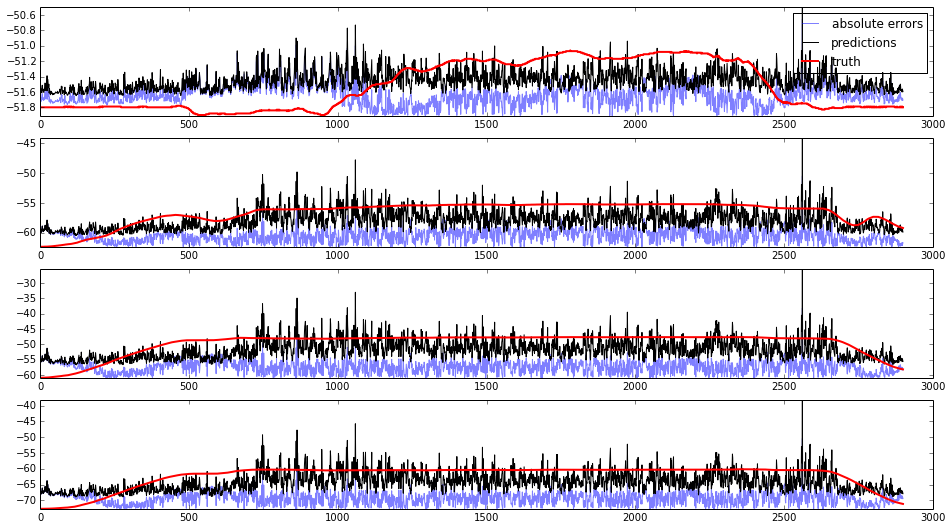

In [162]:
start, stop = 100, 3000
display.predict_report(train_X[start:stop], Y[start:stop], train_Y[start:stop])

In [54]:
wtrain_X, wtrain_Y = data.windowify_labeled_data_set(train_X, train_Y, 500, 1)

In [51]:
wtrain_X.shape

(210520, 2500)

In [52]:
wtrain_Y.shape

(89, 12)